In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

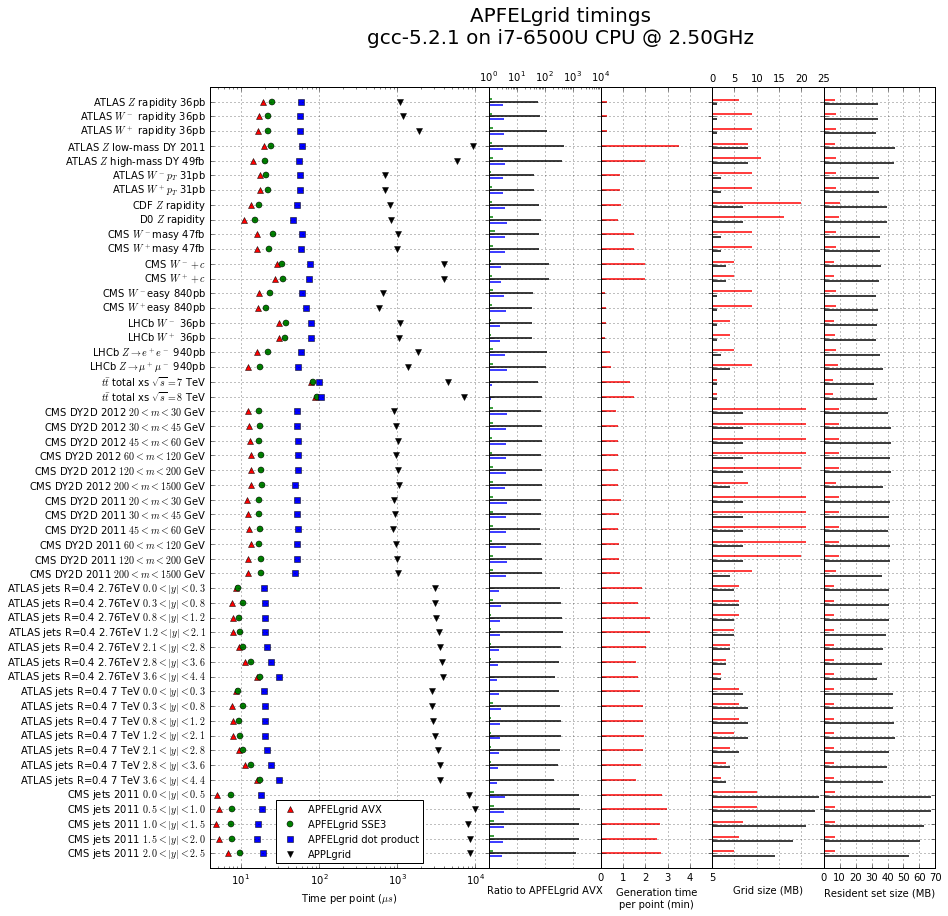

In [104]:
# avx
A = np.array([19.249, 17.07, 16.47,
              19.7204, 
              14.3448,              
              17.4068, 17.552,
              13.3984,
              10.841,              
              16.0645, 15.9502,
              28.5834, 26.941,
              16.9071,16.3043,              
              31.105, 30.553,              
              16.0331, 12.2652,              
              78.227, 89.538,              
              12.376,12.5986,12.8547,13.5613,13.4235,13.5292,              
              12.0493,12.4377,12.5795,13.259,12.3441,12.4072,
              8.6515,7.71981,7.80894, 7.80894, 9.36908, 11.4042,15.9815,
              8.6515,7.71981,7.80894, 7.80894, 9.36908, 11.4042,15.9815,
              4.93155, 5.20853, 4.8293, 5.15925, 6.78432              
             ])
# sse3
B = np.array([24.8454, 22.0718, 22.175,
              24.4794,
              20.0653,              
              21.0915, 22.3068,
              16.8093,
              14.999,
              25.7882, 22.8501,
              33.016, 34.0446, 
              23.7345, 20.6234,              
              37.2964, 36.3592,              
              22.2877, 17.6962,
              84.792, 93.774,
              17.1788, 17.2655,17.176, 18.0613, 18.0613, 18.5147,              
              17.1183, 17.2434,17.6769,17.1277,17.8189,17.9238,
              9.10581, 10.6034, 9.39931, 9.59593, 10.7072, 13.3932, 17.2952,
              9.10581, 10.6034, 9.39931, 9.59593, 10.7072, 13.3932, 17.2952,
              7.54764, 7.76867, 7.36548, 7.65292, 9.56447              
             ])
# std
C = np.array([59.4171, 57.1547, 57.1641,
              60.9933,
              55.4052,              
              57.0537, 56.9799,
              52.4698,
              46.798,              
              61.1188, 58.2922,
              76.2272, 75.2008,
              60.8441, 67.8439,              
              78.3096, 78.6494,
              57.9191, 53.4446,
              100.284, 105.869,              
              52.6564, 52.7755, 53.0361, 53.4292, 53.9265, 48.9368,              
              52.8099, 52.8761, 53.0638, 52.7737, 52.6961, 48.7788,
              19.8534, 20.0386, 20.1612, 20.206, 21.7563, 24.2652,30.7225,
              19.8534, 20.0386, 20.1612, 20.206, 21.7563, 24.2652,30.7225,
              17.8364, 18.7298, 16.7011, 16.0309,19.2469
             ])
# applgrid
D = np.array([1079.4, 1190.3, 1931.24,
              9401.96, 
              5842.31,
              699.652, 704.069,
              814.254,
              823.166,
              1015.48, 998.3,
              3934.95, 3925.59,
              659.673, 589.961,              
              1099.68, 1066.47,
              1858.72, 1386.21,
              4511.95,7148.35,              
              905.428, 973.11, 1016.78, 969.172, 1028.31, 1049.68,
              908.711, 947.619, 876.751, 978.692, 982.263, 1015.99,
              3074.03, 3061.98, 3146.88, 3419.99, 3581.85, 3731.72, 3844.1,
              2796.87, 2828.96, 2904.82, 3057.94, 3289.12, 3544.35, 3561.43,
              8407.73, 9813.6, 8171.29, 8649.79, 8683.7              
             ])

# gen time (minutes)
E = np.array([2.26/8, 3.25/11, 3.29/11,
              28.0/8,
              26.09/13,
              9.46/11, 9.45/11,
              26.58/29,
              21.55/28,
              16.57/11, 16.57/11,
              10.02/5, 10.02/5,
              2.58/12, 3.04/12,              
              1.23/5, 1.04/5, 
              4.33/10, 9.0/19,
              1.33, 1.52,              
              16.29/24, 18.4/24, 18.51/24, 19.19/24, 18.38/24, 9.24/12,
              21.47/24, 19.35/24, 18.40/24, 20.0/24, 19.44/24, 10.35/12,
              20.35/11, 18.54/11, 22.21/10, 22.15/10, 16.11/8, 9.45/6, 5.07/3,
              28.24/16, 30.16/16, 30.42/16, 29.30/15, 22.59/12, 16.19/9, 9.46/6,
              91.55/33, 89.51/30,72.23/27,60.47/24,51.51/19])

# size fk
F = np.array([ 6, 9, 9,
               8,
               11,
               9, 9,
               20,
               16,
               9, 9,
               5, 5,
               9, 9,
               4, 4,
               5, 9,
               1, 1,
               21, 21, 21, 21, 20, 8,
               21, 21, 21, 21, 20, 9,
               6, 6, 6, 5, 4, 3, 2,
               6, 6, 6, 5, 4, 3, 2,
               10,10,7,6,5
             ])

# size applgrid
G = np.array([ 1, 1, 1,
               8,
               8,
               2, 2,
               7,
               7,
               2, 2,
               3, 3,
               1, 1,
               1, 1,
               2, 4,
               1, 1,
               7, 7, 7, 7, 7, 4,
               7, 7, 7, 7, 7, 4,
               5, 6, 5, 5, 4, 3, 2,
               7, 8, 8, 8, 6, 4, 3,              
               24, 23, 21, 18, 14
             ])

# memory fk
H = np.array([ 7.096, 7.520, 7.492,
               7.116,
               7.772,
               7.528, 7.516,
               10.000,
               9.376,
               7.376, 7.460,
               6.652, 6.684,
               7.656, 7.596,
               6.724, 6.796,
               7.396, 8.632,
               6.004, 6.080,
               9.348, 9.340, 9.360, 9.308, 9.344, 7.468,
               9.308, 9.332, 9.304, 9.312, 9.340, 7.392,
               6.656, 6.676, 6.644, 6.588, 6.588, 6.388, 6.188,
               6.656, 6.676, 6.644, 6.588, 6.588, 6.388, 6.188,              
               7.248, 7.224, 6.956, 6.804, 6.768
             ])

# memory applgrid
I = np.array([ 34.060, 34.108, 32.620,
               44.688,
               43.864,
               34.420, 34.796,
               39.872,
               39.628,
               34.984, 35.252,
               35.920, 34.796,
               32.692, 34.320,
               33.452, 33.048,
               35.216, 37.052,
               31.708, 33.156,
               40.376, 42.076, 42.136, 41.296, 42.088, 37.188,
               41.796, 41.224, 40.516, 41.720, 41.404, 36.632,
               40.636, 40.800, 40.960, 39.172, 37.040, 36.680, 33.640,
               43.452, 43.492, 44.228, 44.412, 40.640, 39.464, 37.060,
               66.996, 67.400, 62.664, 60.608, 53.652
             ])

X = np.array(range(len(A)))

# plots
f = plt.figure(figsize=(13,14))
gs = gridspec.GridSpec(1, 5, width_ratios=[5, 2, 2, 2, 2]) 
plt.gca().invert_yaxis()

ax0 = plt.subplot(gs[0])

plt.plot(A,X,'^',color='r', label='APFELgrid AVX')
plt.plot(B,X,'o',color='g', label='APFELgrid SSE3')
plt.plot(C,X,'s',color='b', label='APFELgrid dot product')
plt.plot(D,X,'v',color='k', label='APPLgrid')

plt.yticks(X,
           ('ATLAS $Z$ rapidity 36pb','ATLAS $W^-$ rapidity 36pb','ATLAS $W^+$ rapidity 36pb',
            'ATLAS $Z$ low-mass DY 2011',
            'ATLAS $Z$ high-mass DY 49fb',
            'ATLAS $W^- p_{T}$ 31pb', 'ATLAS $W^+ p_{T}$ 31pb',
            'CDF $Z$ rapidity',
            'D0 $Z$ rapidity',
            'CMS $W^-$masy 47fb','CMS $W^+$masy 47fb',
            'CMS $W^-+c$','CMS $W^+ + c$',
            'CMS $W^-$easy 840pb','CMS $W^+$easy 840pb',            
            'LHCb $W^-$ 36pb', 'LHCb $W^+$ 36pb',
            r'LHCb $Z \rightarrow e^+ e^-$ 940pb',
            r'LHCb $Z \rightarrow \mu^+ \mu^-$ 940pb',
            r'$t\bar{t}$ total xs $\sqrt{s}=7$ TeV', r'$t\bar{t}$ total xs $\sqrt{s}=8$ TeV',
            'CMS DY2D 2012 $20<m<30$ GeV','CMS DY2D 2012 $30<m<45$ GeV','CMS DY2D 2012 $45<m<60$ GeV','CMS DY2D 2012 $60<m<120$ GeV','CMS DY2D 2012 $120<m<200$ GeV','CMS DY2D 2012 $200<m<1500$ GeV',            
            'CMS DY2D 2011 $20<m<30$ GeV','CMS DY2D 2011 $30<m<45$ GeV','CMS DY2D 2011 $45<m<60$ GeV','CMS DY2D 2011 $60<m<120$ GeV','CMS DY2D 2011 $120<m<200$ GeV','CMS DY2D 2011 $200<m<1500$ GeV',
            'ATLAS jets R=0.4 2.76TeV $0.0<|y|<0.3$', 'ATLAS jets R=0.4 2.76TeV $0.3<|y|<0.8$', 'ATLAS jets R=0.4 2.76TeV $0.8<|y|<1.2$', 'ATLAS jets R=0.4 2.76TeV $1.2<|y|<2.1$', 'ATLAS jets R=0.4 2.76TeV $2.1<|y|<2.8$','ATLAS jets R=0.4 2.76TeV $2.8<|y|<3.6$','ATLAS jets R=0.4 2.76TeV $3.6<|y|<4.4$',
            'ATLAS jets R=0.4 7 TeV $0.0<|y|<0.3$', 'ATLAS jets R=0.4 7 TeV $0.3<|y|<0.8$', 'ATLAS jets R=0.4 7 TeV $0.8<|y|<1.2$', 'ATLAS jets R=0.4 7 TeV $1.2<|y|<2.1$', 'ATLAS jets R=0.4 7 TeV $2.1<|y|<2.8$','ATLAS jets R=0.4 7 TeV $2.8<|y|<3.6$','ATLAS jets R=0.4 7 TeV $3.6<|y|<4.4$',
            'CMS jets 2011 $0.0<|y|<0.5$','CMS jets 2011 $0.5<|y|<1.0$','CMS jets 2011 $1.0<|y|<1.5$','CMS jets 2011 $1.5<|y|<2.0$','CMS jets 2011 $2.0<|y|<2.5$',             
            ))
plt.xlabel('Time per point ($\mu s$)')
plt.legend(loc='lower center',numpoints=1,fontsize=10)
plt.ylim([52,-1])
plt.xlim([4e0, 1.5e4])
plt.xscale('log')
plt.grid()

ax1 = plt.subplot(gs[1], sharey=ax0)
plt.xlabel('\nRatio to APFELgrid AVX')
ax1.xaxis.tick_top()

plt.hlines(X-0.2,1,B/A,'g', lw=1.5)
plt.hlines(X,1,D/A,'k', lw=1.5)
plt.hlines(X+0.2,1,C/A,'b', lw=1.5)

plt.ylim([52,-1])
#plt.xlim([1.0,100.0])
plt.grid()
plt.xscale('log')

plt.setp(ax1.get_yticklabels(), visible=False)
#plt.setp([ax0], title='gcc-5.2.1 on i7-6500U CPU @ 2.50GHz')

ax2 = plt.subplot(gs[2], sharey=ax1)
plt.hlines(X,0,E,'r', lw=1.5)

plt.xlabel('Generation time\nper point (min)')
plt.xlim([0,5])
plt.ylim([52,-1])
plt.grid()
plt.setp(ax2.get_yticklabels(), visible=False)

ax3 = plt.subplot(gs[3], sharey=ax2)
plt.xlabel('\nGrid size (MB)')

plt.hlines(X-0.15,0,F,'r', lw=1.5)
plt.hlines(X+0.15,0,G,'k', lw=1.5)

plt.ylim([52,-1])
plt.grid()
ax3.xaxis.tick_top()
plt.setp(ax3.get_yticklabels(), visible=False)

ax4 = plt.subplot(gs[4], sharey=ax3)
plt.xlabel('Resident set size (MB)')

plt.hlines(X-0.15,0,H,'r', lw=1.5)
plt.hlines(X+0.15,0,I,'k', lw=1.5)

plt.ylim([52,-1])
#plt.xlim([0,50])
plt.grid()
plt.setp(ax4.get_yticklabels(), visible=False)

f.suptitle('APFELgrid timings\ngcc-5.2.1 on i7-6500U CPU @ 2.50GHz', fontsize=20)
gs.update(wspace=0.0)

plt.savefig('../plots/t0.pdf',bbox_inches='tight')